In [0]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
%matplotlib inline
# For loading .arff files
from scipy.io import arff

In [0]:
############################################################
# Loads the 5 raw .arff files into a list
def load_arff_raw_data():
    N=5
    return [arff.loadarff(str(i+1) + 'year.arff') for i in range(N)]

############################################################
# Loads the 5 raw .arff files into pandas dataframes
def load_dataframes():
    return [pd.DataFrame(data_i_year[0]) for data_i_year in load_arff_raw_data()]

############################################################
# Set the column headers from X1 ... X64 and the class label as Y, for all the 5 dataframes.
def set_new_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
    cols.append('Y')
    for df in dataframes:
        df.columns = cols

############################################################
# dataframes is the list of pandas dataframes for the 5 year datafiles.  
dataframes = load_dataframes()

# Set the new headers for the dataframes. The new headers will have the renamed set of feature (X1 to X64)
set_new_headers(dataframes)    

# print the first 5 rows of a dataset 'year1'
dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,1.2479,0.21402,0.119980,0.47706,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,593.2700,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,0.25792,2.2437,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,1.4293,0.24806,0.123040,NaN,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,0.33472,17.8660,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,1.4283,0.30260,0.189960,NaN,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.11550,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.11550,1.3562,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.77,100.980,0.28720,1.56960,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.187320,0.33147,0.121820,0.187320,1133.20,0.32211,1.6307,0.187320,0.115530,57.045,NaN,0.19832,0.115530,0.18732,0.38677,0.32211,1.41380,1.1184,4.1424,0.27884,0.115530,147.04,2.4823,0.32340,0.19832,1.6278,11.2470,0.43489,0.122310,0.293040,0.096680,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.188110,0.116010,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [0]:
dataframes[0].shape

(7027, 65)

In [0]:
# Convert the dtypes of all the columns (other than the class label columns) to float.
def convert_columns_type_float(dfs):
    for i in range(5):
        index = 1
        while(index<=63):
            colname = dfs[i].columns[index]
            col = getattr(dfs[i], colname)
            dfs[i][colname] = col.astype(float)
            index+=1
            
convert_columns_type_float(dataframes)    

In [0]:
# The class labels for all the dataframes are originally in object type.
# Convert them to int types
def convert_class_label_type_int(dfs):
    for i in range(len(dfs)):
        col = getattr(dfs[i], 'Y')
        dfs[i]['Y'] = col.astype(int)
        
convert_class_label_type_int(dataframes)

In [0]:
# To analyze the type of missing data
import missingno as msno

In [0]:
# Missing Values in the fourth Dataframe

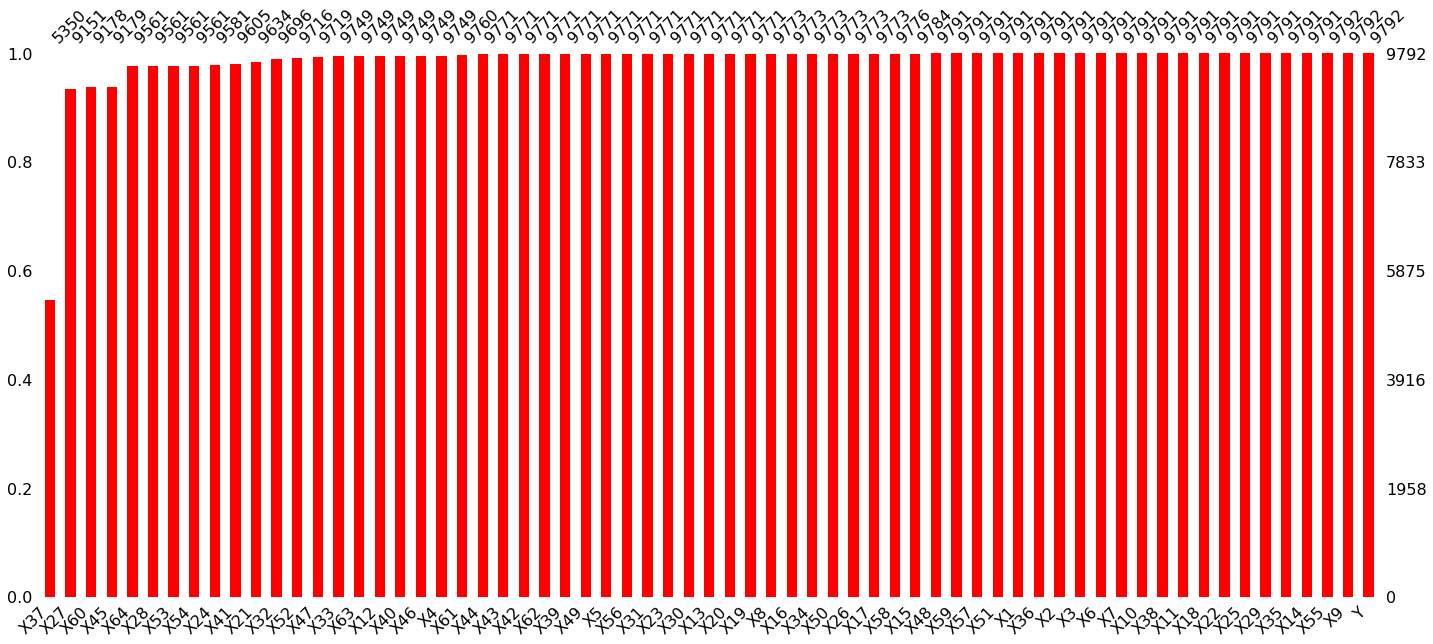

In [0]:
msno.bar(dataframes[3],color='red',labels=True,sort="ascending") 

In [0]:
# Missing Values in the fifth Dataframe

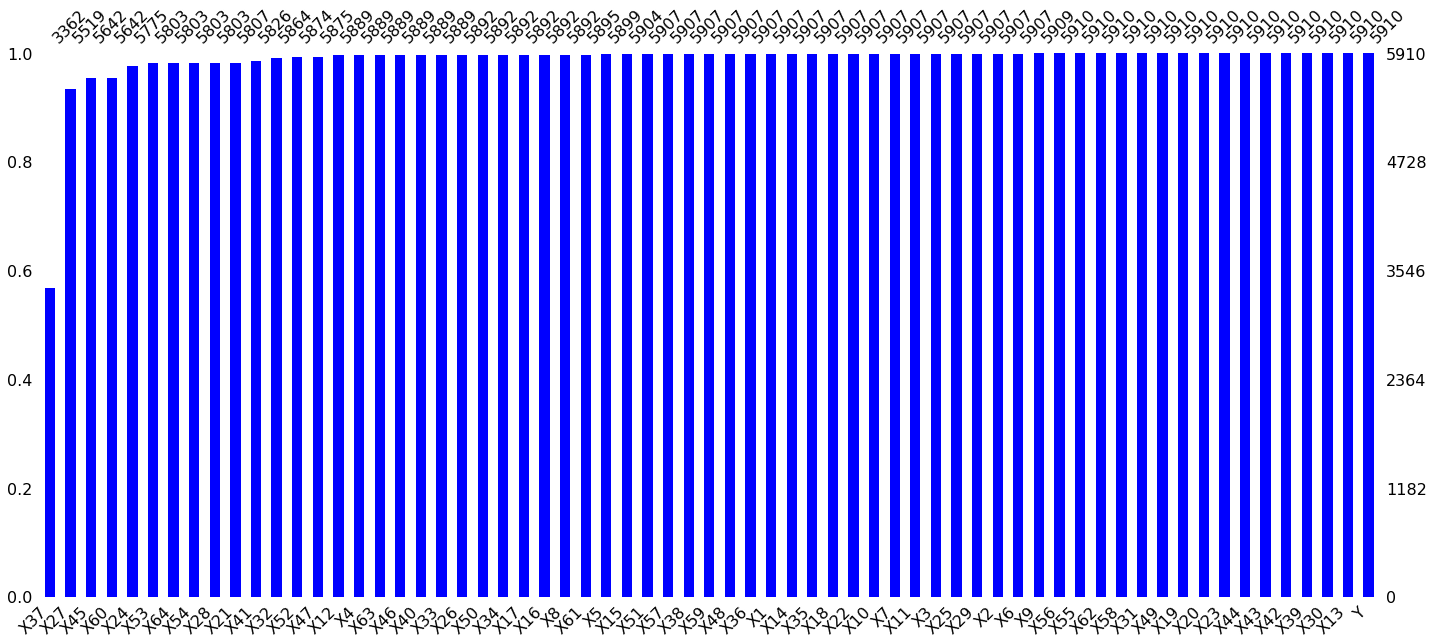

In [0]:
msno.bar(dataframes[4],color='blue',labels=True,sort="ascending") 

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [0]:
# Imputation for the fourth Dataframe

In [0]:
mean_imputed_df4=pd.DataFrame(imputer.fit_transform(dataframes[3]),columns=dataframes[0].columns)

In [0]:
# Imputation for the fifth Dataframe

In [0]:
mean_imputed_df5=pd.DataFrame(imputer.fit_transform(dataframes[4]),columns=dataframes[1].columns)

In [0]:
#Check for missing values 

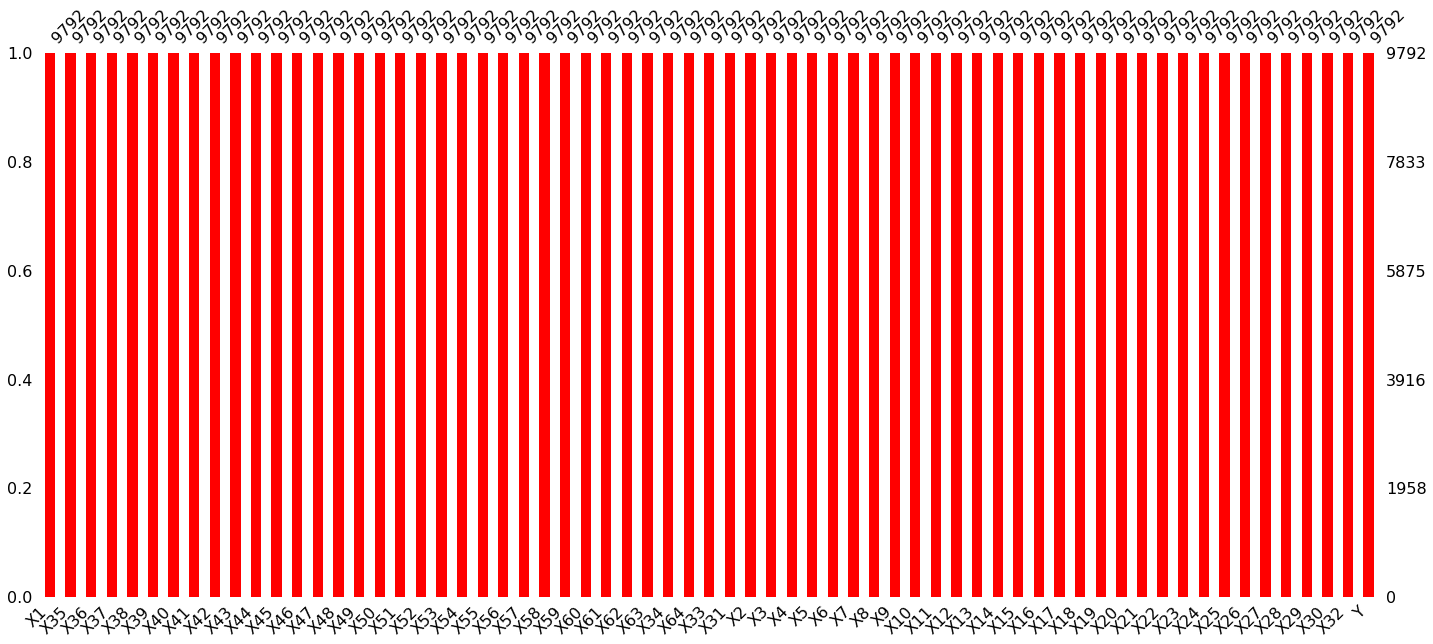

In [0]:
msno.bar(mean_imputed_df4,color='red',labels=True,sort="ascending") 

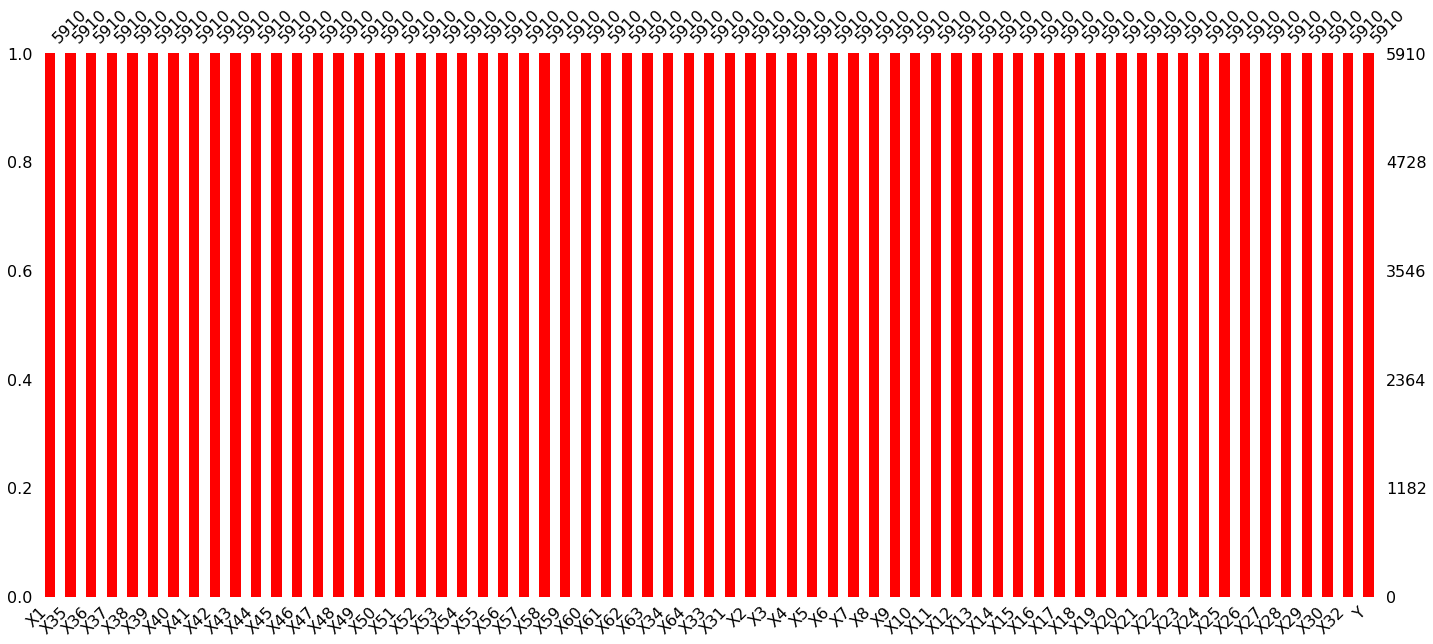

In [0]:
msno.bar(mean_imputed_df5,color='red',labels=True,sort="ascending") 

####  Iterative imputation

In [0]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [0]:
imputer = IterativeImputer()


In [0]:
iterative_imputed_df4 = pd.DataFrame(imputer.fit_transform(dataframes[3]),columns=dataframes[0].columns)

In [0]:
iterative_imputed_df5 = pd.DataFrame(imputer.fit_transform(dataframes[4]),columns=dataframes[1].columns)


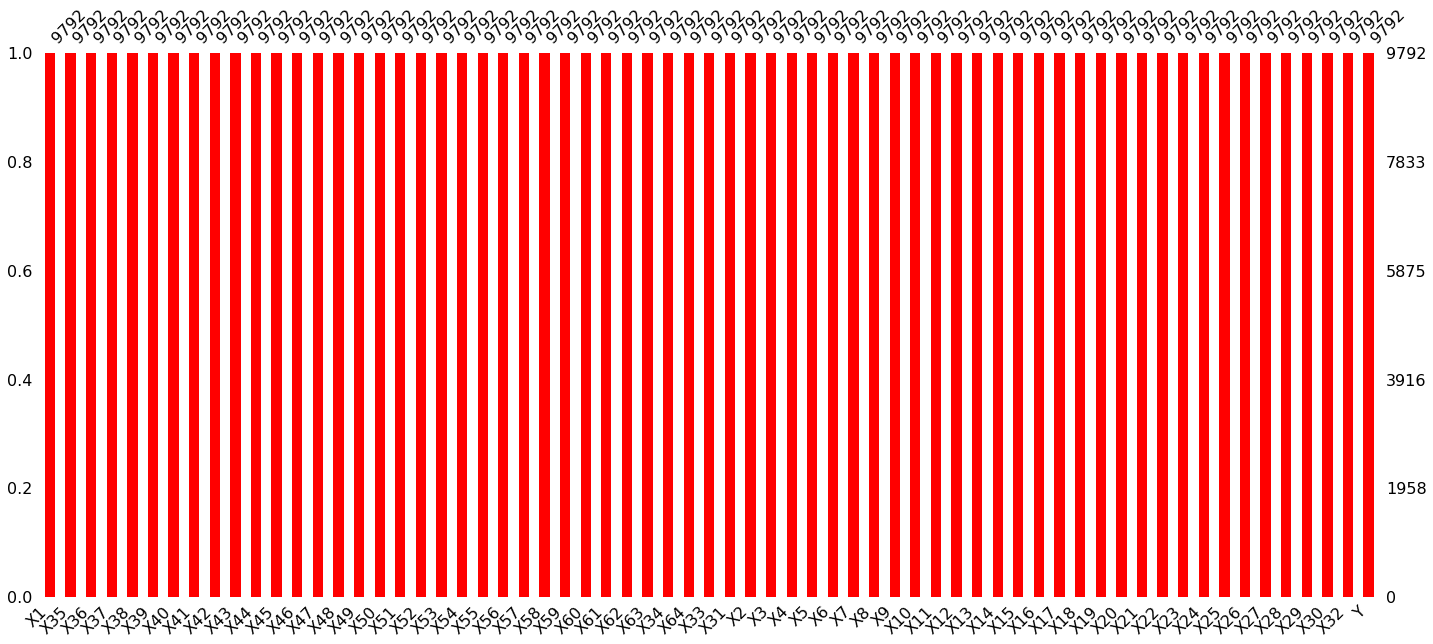

In [0]:
msno.bar(iterative_imputed_df4,color='red',labels=True,sort="ascending") 

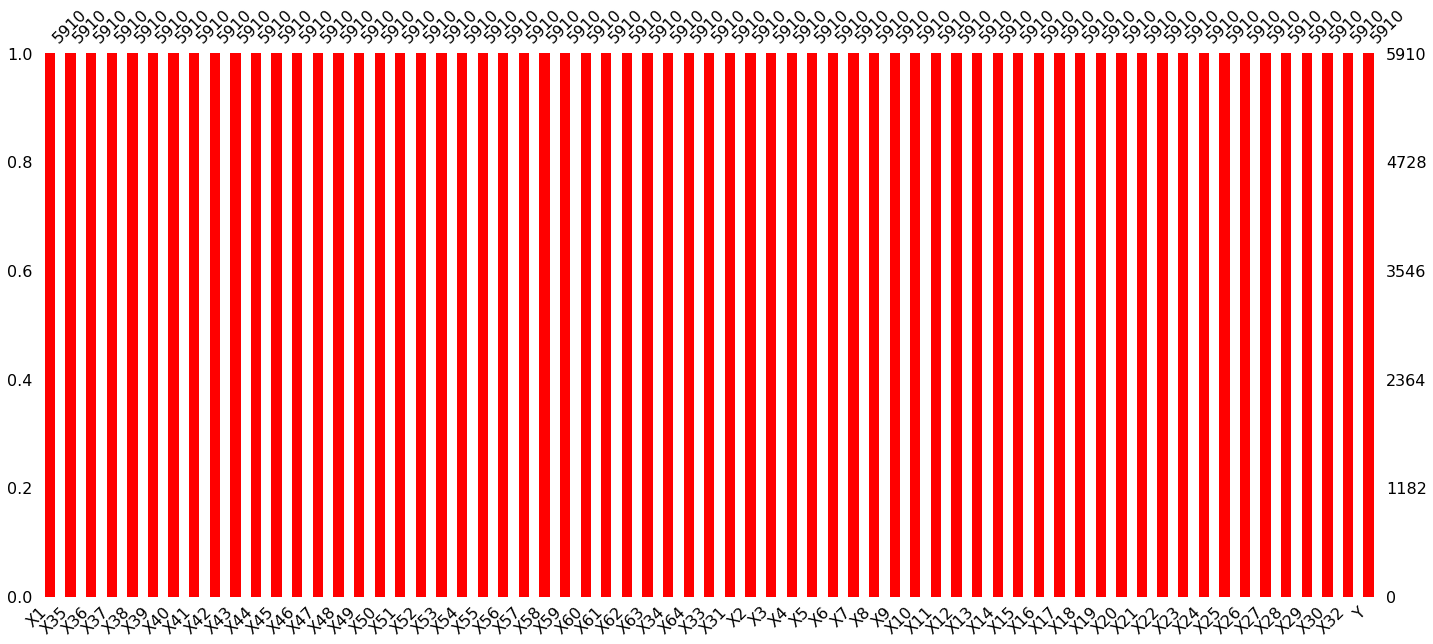

In [0]:
msno.bar(iterative_imputed_df5,color='red',labels=True,sort="ascending") 

In [0]:
X6=mean_imputed_df4.drop('Y',axis=1)
y6=mean_imputed_df4.Y

In [0]:

X7=mean_imputed_df5.drop('Y',axis=1)
y7=mean_imputed_df5.Y

In [0]:
X8=iterative_imputed_df4.drop('Y',axis=1)
y8=iterative_imputed_df4.Y

In [0]:
X9=iterative_imputed_df5.drop('Y',axis=1)
y9=iterative_imputed_df5.Y

In [0]:
#Feature selection for Dataframes

In [0]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
features_names=X6.columns.tolist()
lasso = Lasso(alpha=0.01 ,positive=True)
lasso.fit(X6,y6)
coef_list=sorted(zip(map(lambda x: round(x,4),
                    lasso.coef_.reshape(-1)),features_names),reverse=True)
coef_list [0:5]    

[(0.0009, 'X21'), (0.0002, 'X2'), (0.0001, 'X42'), (0.0, 'X9'), (0.0, 'X8')]

By performing LASSO regularization, we end with only 3 SIGNIFICANT features out of 64. The columns which are significant are given below. 
•X21 -sales (n) / sales (n-1)
•X2 - total liabilities / total assets
•X42 - profit on operating activities / sales



In [0]:
features_names=X7.columns.tolist()
lasso = Lasso(alpha=0.01 ,positive=True)
lasso.fit(X7,y7)
coef_list=sorted(zip(map(lambda x: round(x,4),
                    lasso.coef_.reshape(-1)),features_names),reverse=True)
coef_list [0:10] 

[(0.0216, 'X51'),
 (0.0015, 'X2'),
 (0.001, 'X9'),
 (0.001, 'X36'),
 (0.0003, 'X59'),
 (0.0003, 'X52'),
 (0.0001, 'X61'),
 (0.0001, 'X31'),
 (0.0001, 'X30'),
 (0.0001, 'X20')]

By performing LASSO regularization, we end with only 10 SIGNIFICANT features out of 64. The columns which are significant are given below. 
X51-short-term liabilities / total assets
X2-total liabilities / total assets
X9-sales / total assets
X36-total sales / total assets
X59-long-term liabilities / equity
X52-(short-term liabilities * 365) / cost of products sold)
X61-sales / receivables
X31-(gross profit + interest) / sales
X30-(total liabilities - cash) / sales
X20-(inventory * 365) / sales

In [0]:
features_names=X8.columns.tolist()
lasso = Lasso(alpha=0.01 ,positive=True)
lasso.fit(X8,y8)
coef_list=sorted(zip(map(lambda x: round(x,4),
                    lasso.coef_.reshape(-1)),features_names),reverse=True)
coef_list [0:5] 

[(0.0009, 'X21'), (0.0002, 'X42'), (0.0002, 'X2'), (0.0, 'X9'), (0.0, 'X8')]

By performing LASSO regularization, we end with only 10 SIGNIFICANT features out of 64. The columns which are significant are given below. 
X21-sales (n) / sales (n-1)
X2-total liabilities / total assets
X42-profit on operating activities / sales


In [0]:
features_names=X9.columns.tolist()
lasso = Lasso(alpha=0.01 ,positive=True)
lasso.fit(X9,y9)
coef_list=sorted(zip(map(lambda x: round(x,4),
                    lasso.coef_.reshape(-1)),features_names),reverse=True)
coef_list [0:10] 

[(0.0214, 'X51'),
 (0.0015, 'X2'),
 (0.0012, 'X9'),
 (0.0009, 'X36'),
 (0.0003, 'X59'),
 (0.0003, 'X52'),
 (0.0001, 'X61'),
 (0.0001, 'X31'),
 (0.0001, 'X30'),
 (0.0001, 'X20')]

By performing LASSO regularization, we end with only 10 SIGNIFICANT features out of 64. The columns which are significant are given below. 
X51-short-term liabilities / total assets
X2-total liabilities / total assets
X9-sales / total assets
X36-total sales / total assets
X59-long-term liabilities / equity
X52-(short-term liabilities * 365) / cost of products sold)
X61-sales / receivables
X31-(gross profit + interest) / sales
X30-(total liabilities - cash) / sales
X20-(inventory * 365) / sales